In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('weight-height.csv')

In [3]:
df = df.drop('Gender',axis = 1)

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Text(0, 0.5, 'Height')

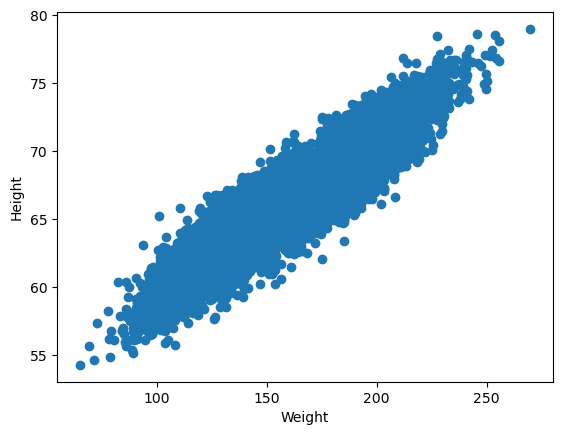

In [15]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [17]:
## Correlation

df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


C:\Users\shivam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


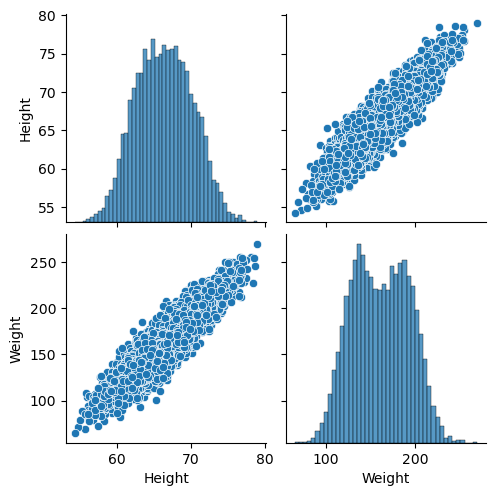

In [21]:
import seaborn as sns
sns.pairplot(df)

In [27]:
## independent and Dependent features
X = df[['Weight']] ## independent features should be dataframe or 2d-array 
y = df['Height'] ## it can be a 1-D or series as we will only have one column in target variable

In [31]:
## train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


In [41]:
X_test.shape

(2500, 1)

In [43]:
## standardization mean == 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [47]:
X_train

array([[-0.04659659],
       [ 1.34251968],
       [-0.34628208],
       ...,
       [-0.13835268],
       [ 0.56699643],
       [-0.33884025]])

In [49]:
X_test = scaler.transform(X_test)

In [53]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1) 

In [55]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [69]:
print("Coefficient:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient: [3.5520765]
Intercept: 66.34834766149207


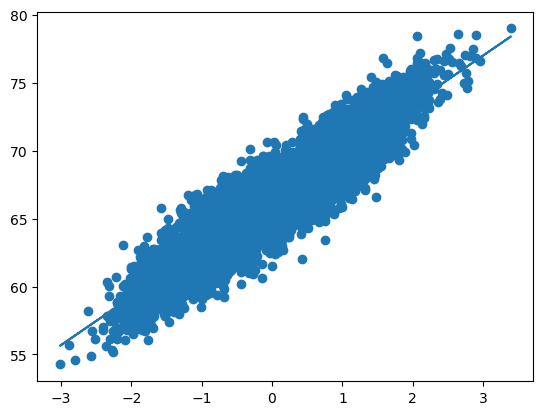

In [73]:
## Plot training data with best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## Predicted height output = intercept + coef_(Weights)
## y_pred_test = 66.348 + 3.552(X_test)

In [80]:
## Prediction for test data

y_pred = regression.predict(X_test)

In [82]:
y_pred

array([67.66673256, 70.11227616, 67.3452232 , ..., 62.20315456,
       66.80250232, 66.55658642])

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [94]:
mse,mae,rmse

(2.1245002931280457, 1.16186862410503, 1.4575665655907608)

In [96]:
from sklearn.metrics import r2_score

In [100]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [102]:
mse,mae,rmse,r2

(2.1245002931280457, 1.16186862410503, 1.4575665655907608, 0.857428881104187)

In [104]:
## OLS Linear regression
import statsmodels.api as sm

In [106]:
model = sm.OLS(y_train,X_train).fit()

In [108]:
pre = model.predict(X_test)

In [110]:
print(pre)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [114]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                    3.63e-06
Time:                        18:50:45   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [120]:
print("With Scaling:", regression.predict(scaler.transform([[158]])))
print("Without Scaling:",regression.predict([[158]]))

With Scaling: [65.98996608]
Without Scaling: [627.57643525]


C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
